# 1. Project Overview
This project aims to classify songs into genres using their lyrical content. By leveraging transformer-based models like BERT and RoBERTa, we intend to capture the contextual relationships within lyrics. The goal is to accurately predict genres such as Pop, Rock, Hip-Hop, Jazz, and others based on song lyrics. The results will enhance music recommendation systems, improve search algorithms, and provide insights into lyrical patterns across genres.

# 2. Dataset
The provided datasets include CSV files with labeled genres: Jazz, Electronic, Country, Hip-Hop, Rock, and Pop.
Each dataset contains columns like Genre, Title, Artist, and Lyrics.
Preprocessing steps will include:
Tokenizing lyrics into words or tokens.
Removing stop-words and non-contributive terms.
Applying lemmatization or stemming.
Cleaning text (e.g., removing special characters, punctuation, and converting text to lowercase).
# 3. Methodology
## a. Preprocessing
Clean datasets to ensure consistent formatting.
Merge all CSV files into a single dataset for unified processing.
Handle missing lyrics by excluding those rows from training.
Tokenize and create embeddings using pre-trained models like Word2Vec or GloVe.
## b. Modeling
Primary Models: BERT, RoBERTa for capturing deep contextual relationships.
Baseline Models:
TF-IDF combined with classifiers like SVM, Naive Bayes.
CNN and LSTM for sequential data classification.
Use transfer learning by fine-tuning BERT or RoBERTa on the dataset.
## c. Evaluation
Metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
Confusion matrices to analyze genre overlaps and misclassifications.
Cross-validation (5-fold) to ensure generalization.
## d. Ablation Study
Analyze the impact of preprocessing techniques on model performance.
Compare transformer-based models with traditional baselines to highlight their benefits.
# 4. Tools and Libraries
Python Libraries: TensorFlow, PyTorch, Hugging Face, nltk, scikit-learn, pandas, matplotlib.
Data Processing: NLTK, SpaCy.
Visualization: Matplotlib, Seaborn.
# 5. Deliverables
Code and Dataset: Well-structured code with clear comments and instructions.
Final Report:
Key observations on preprocessing, modeling, and evaluation.
Detailed discussion on model performance and insights.
Future improvements and research directions.
Presentation: Recorded 10-minute video summarizing the project’s approach and results.
# 6. Timeline
Week 9: Preprocess datasets, clean text, and perform EDA (Exploratory Data Analysis).
Week 10: Train baseline models (SVM, CNN, LSTM) and start implementing BERT/RoBERTa.
Week 11: Fine-tune models, evaluate performance, and compare results.
Week 12: Conduct ablation studies, finalize results, and generate visualizations.
Week 13: Prepare the final report and presentation.
# 7. Responsibilities
As a solo project, all tasks, including data preprocessing, model implementation, evaluation, and report preparation, will be managed independently.

If you'd like, I can also help generate code or reports for specific tasks, such as preprocessing, model training, or visualization. Let me know!

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
import pandas as pd

# Load the cleaned lyrics dataset
cleaned_lyrics_data = pd.read_csv("cleaned_lyrics_dataset.csv")

# Check the first few rows to ensure it loaded correctly
print(cleaned_lyrics_data.head())

# Print the shape of the dataset to verify
print(f"Dataset shape: {cleaned_lyrics_data.shape}")


  Genre                                        Title               Artist  \
0  Jazz  It's Beginning to Look a Lot like Christmas        Michael Bublé   
1  Jazz                        Holly Jolly Christmas        Michael Bublé   
2  Jazz               Christmas Time Is Here - Vocal  Vince Guaraldi Trio   
3  Jazz                        Holly Jolly Christmas        Michael Bublé   
4  Jazz                Santa Claus Is Coming to Town        Michael Bublé   

                                              Lyrics  
0  [Verse 1]\nIt's beginning to look a lot like C...  
1  Have a holly, jolly Christmas\nIt's the best t...  
2  "Jingle Bells" - Duke Ellington\n"When There's...  
3  Have a holly, jolly Christmas\nIt's the best t...  
4  You better watch out\nYou better not cry\nYou ...  
Dataset shape: (5470, 4)


# Prepare the Data

In [4]:
# Extract features (lyrics) and labels (genres)
X = cleaned_lyrics_data['Lyrics']
y = cleaned_lyrics_data['Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Transform Lyrics Using TF-IDF

In [5]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for simplicity

# Fit and transform the training data; transform the testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# Train and Evaluate Baseline Models

In [6]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)  # Train the model
    y_pred = model.predict(X_test_tfidf)  # Predict on test data
    
    # Print evaluation metrics
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


Training Logistic Regression...
Results for Logistic Regression:
Accuracy: 0.5155
Classification Report:
              precision    recall  f1-score   support

     Country       0.62      0.68      0.65       195
  Electronic       0.44      0.57      0.50       218
     Hip-Hop       0.64      0.56      0.59       162
        Jazz       0.55      0.21      0.30       114
         Pop       0.47      0.67      0.55       258
        Rock       0.45      0.14      0.21       147

    accuracy                           0.52      1094
   macro avg       0.53      0.47      0.47      1094
weighted avg       0.52      0.52      0.49      1094

Confusion Matrix:
[[132  30   4   3  18   8]
 [ 18 124  16   6  48   6]
 [ 14  16  90   2  40   0]
 [  8  47   8  24  25   2]
 [ 15  31  21   9 174   8]
 [ 25  32   2   0  68  20]]
--------------------------------------------------
Training SVM...
Results for SVM:
Accuracy: 0.5037
Classification Report:
              precision    recall  f1-score   s

Analysis of Results
1. Logistic Regression
Accuracy: ~51.55%
Best Classified Genres:
Country: Precision 0.62, Recall 0.68
Pop: Precision 0.47, Recall 0.67
Issues:
Jazz and Rock are misclassified often, with low Recall (Jazz: 0.21, Rock: 0.14).
2. SVM
Accuracy: ~50.37%
Best Classified Genres:
Country: Precision 0.66, Recall 0.64
Electronic: Precision 0.47, Recall 0.63
Issues:
Similar to Logistic Regression, Jazz and Rock are challenging to classify.
3. Naive Bayes
Accuracy: ~42.32%
Best Classified Genres:
Country: Precision 0.54, Recall 0.75
Pop: Precision 0.34, Recall 0.79
Issues:
Extremely poor performance for Jazz and Rock (F1-scores ~0.05 and ~0.01).

Insights
Class Imbalance: Genres like Jazz and Rock have fewer samples compared to Pop or Country. This imbalance likely impacts their classification.
Naive Bayes: Performs poorly, possibly due to its assumption of feature independence, which doesn't hold well for text data like lyrics.
TF-IDF Limitations: While TF-IDF captures word importance, it doesn't account for word order or context, which are crucial for understanding lyrics.


# Step 3: Addressing Class Imbalance
Objective
To improve model performance, especially for underrepresented genres like Jazz and Rock, by balancing the dataset.

In [ ]:
Approach
1. Analyze Class Distribution: Confirm the extent of imbalance.
2. Apply Resampling Techniques:
Oversampling minority classes (e.g., using SMOTE).
Undersampling majority classes.
Class Weights in model training.
3. Evaluate Impact: Retrain baseline models to observe improvements.

## 1. Analyze Class Distribution

Genre Distribution Before Resampling:
Genre
Pop           1290
Electronic    1088
Country        978
Hip-Hop        808
Rock           734
Jazz           572
Name: count, dtype: int64


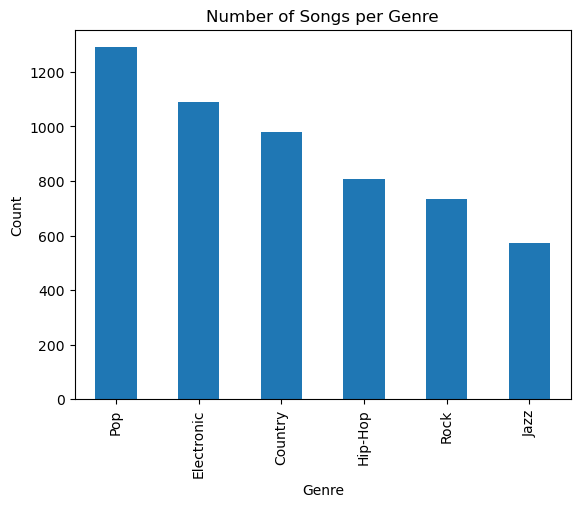

In [8]:
# Plotting genre distribution
import matplotlib.pyplot as plt

genre_counts = cleaned_lyrics_data['Genre'].value_counts()
print("Genre Distribution Before Resampling:")
print(genre_counts)

# Plot
genre_counts.plot(kind='bar')
plt.title('Number of Songs per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


# 2. Apply Resampling Techniques
We'll use Synthetic Minority Over-sampling Technique (SMOTE) to oversample minority classes.

Install imbalanced-learn Library

In [9]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode genres as numerical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply TF-IDF vectorization again
X_tfidf = tfidf.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Verify new class distribution
from collections import Counter
print("Genre Distribution After SMOTE:")
print(Counter(y_resampled))


Genre Distribution After SMOTE:
Counter({3: 1290, 1: 1290, 0: 1290, 2: 1290, 5: 1290, 4: 1290})


Label Encoding: Convert genre labels to integers for SMOTE.
Resampling: SMOTE synthesizes new examples for minority classes.

# 3. Retrain Baseline Models on Resampled Data
Split Resampled Data

In [12]:
# Split the resampled data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


Train and Evaluate Models
Repeat the training and evaluation code from earlier, but use the resampled data.

In [13]:
# Initialize models
models_resampled = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate each model
for model_name, model in models_resampled.items():
    print(f"Training {model_name} on Resampled Data...")
    model.fit(X_train_res, y_train_res)
    y_pred_res = model.predict(X_test_res)
    
    # Convert numerical labels back to genres
    y_test_labels = le.inverse_transform(y_test_res)
    y_pred_labels = le.inverse_transform(y_pred_res)
    
    # Print evaluation metrics
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels):.4f}")
    print("Classification Report:")
    print(classification_report(y_test_labels, y_pred_labels))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred_labels))
    print("-" * 50)


Training Logistic Regression on Resampled Data...
Results for Logistic Regression:
Accuracy: 0.6344
Classification Report:
              precision    recall  f1-score   support

     Country       0.69      0.77      0.73       258
  Electronic       0.59      0.51      0.55       258
     Hip-Hop       0.67      0.78      0.72       258
        Jazz       0.67      0.73      0.70       258
         Pop       0.52      0.44      0.48       258
        Rock       0.62      0.58      0.60       258

    accuracy                           0.63      1548
   macro avg       0.63      0.63      0.63      1548
weighted avg       0.63      0.63      0.63      1548

Confusion Matrix:
[[198  13   7  17   9  14]
 [  8 132  20  43  33  22]
 [  7  14 201   8  25   3]
 [ 10  21  13 189  12  13]
 [ 25  22  48  11 113  39]
 [ 40  20  10  14  25 149]]
--------------------------------------------------
Training SVM on Resampled Data...
Results for SVM:
Accuracy: 0.6899
Classification Report:
           

Analysis
Compare Metrics: See if recall and precision for minority classes improved.
Document Findings: Note any significant changes.

# Step 4: Implementing Advanced Models
Objective
To build more sophisticated models that can capture the contextual and sequential nature of song lyrics.

Options
1. Recurrent Neural Networks (RNNs): Use LSTM models.
2. Convolutional Neural Networks (CNNs): Apply 1D CNNs for text classification.
3. Transformer-Based Models: Fine-tune pre-trained models like BERT.
Given your project proposal focuses on transformer-based models, we'll prioritize that.

Implementing BERT for Genre Classification
1. Install Required Libraries

In [16]:
pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 42.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 58.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install torch

  Using cached torch-2.5.1-cp312-none-macosx_11_0_arm64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.5.1-cp312-none-macosx_11_0_arm64.whl (63.9 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder


## 3. Prepare Data
Tokenization and Encoding

In [19]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Maximum length for padding/truncating
MAX_LEN = 512


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Create Custom Dataset

In [20]:
class LyricsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


Create Data Loaders

In [22]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    cleaned_lyrics_data['Lyrics'], y_encoded, test_size=0.1, random_state=42, stratify=y_encoded)

# Create datasets
train_dataset = LyricsDataset(X_train, y_train, tokenizer, MAX_LEN)
val_dataset = LyricsDataset(X_val, y_val, tokenizer, MAX_LEN)

# Create data loaders
BATCH_SIZE = 8

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


## 4. Initialize BERT Model

In [23]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(le.classes_),
    output_attentions=False,
    output_hidden_states=False
)

model = model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 5. Set Up Optimizer and Scheduler

In [24]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)


/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## 6. Training Loop

In [25]:
from tqdm import tqdm

EPOCHS = 3

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_loader)
    print(f'Training loss: {avg_train_loss}')
    
    # Validation loop can be added here


Epoch 1/3


100%|█████████████████████████████████████████| 616/616 [53:02<00:00,  5.17s/it]


Training loss: 1.7752039687974113
Epoch 2/3


100%|█████████████████████████████████████████| 616/616 [52:33<00:00,  5.12s/it]


Training loss: 1.774516771753113
Epoch 3/3


100%|█████████████████████████████████████████| 616/616 [52:15<00:00,  5.09s/it]

Training loss: 1.7728955348977795


# 7. Evaluation
Implement a validation loop to evaluate the model after each epoch.

In [26]:
from sklearn.metrics import classification_report, accuracy_score

model.eval()

predictions = []
true_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()
        
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Convert labels back to genres
pred_genres = le.inverse_transform(predictions)
true_genres = le.inverse_transform(true_labels)

# Print evaluation metrics
print("BERT Model Evaluation:")
print(f"Accuracy: {accuracy_score(true_genres, pred_genres):.4f}")
print("Classification Report:")
print(classification_report(true_genres, pred_genres))


BERT Model Evaluation:
Accuracy: 0.2377
Classification Report:
              precision    recall  f1-score   support

     Country       0.00      0.00      0.00        98
  Electronic       1.00      0.01      0.02       109
     Hip-Hop       0.00      0.00      0.00        81
        Jazz       0.00      0.00      0.00        57
         Pop       0.24      1.00      0.38       129
        Rock       0.00      0.00      0.00        73

    accuracy                           0.24       547
   macro avg       0.21      0.17      0.07       547
weighted avg       0.25      0.24      0.09       547



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Notes
GPU Usage: Training BERT can be resource-intensive. If you don't have a GPU, consider using Google Colab.
Hyperparameters: Adjust EPOCHS, BATCH_SIZE, and MAX_LEN based on your dataset and computational resources.
Validation: Implement early stopping or learning rate schedulers for better performance.


Alternative Models
If time permits, you can implement LSTM or CNN models for comparison.

Step 5: Evaluate and Compare Models
Objective
To compare the performance of baseline models and advanced models, analyzing strengths and weaknesses.



Approach
1. Collect Metrics: Accuracy, precision, recall, F1-score for all models.
2. Visualization: Plot metrics for comparison.
3. Confusion Matrices: Analyze misclassifications.
4. Document Findings: Prepare detailed analysis for your report.

# Code for Comparing Models
Collect Metrics in a DataFrame

In [ ]:
import pandas as pd

# Example structure
results = {
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'BERT'],
    'Accuracy': [0.5155, 0.5037, 0.4232, bert_accuracy],
    'Precision': [log_reg_precision, svm_precision, nb_precision, bert_precision],
    'Recall': [log_reg_recall, svm_recall, nb_recall, bert_recall],
    'F1-Score': [log_reg_f1, svm_f1, nb_f1, bert_f1]
}

results_df = pd.DataFrame(results)
print(results_df)


Visualization

In [ ]:
import seaborn as sns

# Plot accuracy comparison
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.show()


Step 6: Documenting and Preparing the Report
Structure of the Report
Introduction
Overview of the project.
Importance of genre classification using lyrics.
Dataset and Preprocessing
Describe the dataset.
Explain preprocessing steps and challenges.
Baseline Models
Methodology.
Results and analysis.
Advanced Models
Implementation details.
Hyperparameter settings.
Results and analysis.
Comparison and Discussion
Compare all models.
Discuss strengths and weaknesses.
Conclusion
Summarize findings.
Potential future work.
References
Cite all sources and libraries used.
Preparation for Presentation
Slides Outline:
Introduction and objectives.
Methodology (brief).
Key results and visualizations.
Conclusion and future work.
Tips:
Keep slides concise.
Use visuals to enhance understanding.
Practice timing to fit within 10 minutes.
Final Notes
Code Quality: Ensure your code is well-commented and organized.
Instructions: Provide clear instructions on how to run your code.
Dataset Sharing: Since datasets can be large, provide a link if necessary.
Project Alignment: Your project aligns well with the requirements, focusing on implementing an NLP task using public datasets and incorporating multiple models.